In [1]:
'''

    wine 분류
    
    1.0 4898 - white wine
    0.0 1599 - red wine
'''

'\n\n    wine 분류\n    \n    1.0 4898 - white wine\n    0.0 1599 - red wine\n'

In [2]:
import numpy as np
import pandas as pd

### 1. 데이터 준비

In [3]:
wine = pd.read_csv(r"C:\Users\YB\Desktop\tf24_study\01_지도학습\kNN_wine분류_사이킷런API활용_수강생제공용\wine.csv")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.shape

(6497, 4)

In [5]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

### 2. 입력데이터와 label 생성

In [6]:
wine_data = wine.iloc[:,:3]
wine_target = wine.iloc[:,3]
wine_data.shape, wine_target.shape

((6497, 3), (6497,))

### 3. 훈련 데이터 및 테스트 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(wine_data,wine_target,test_size=0.2,random_state=1)

In [25]:
X_train.shape,y_train.shape

((5197, 3), (5197,))

In [10]:
X_test.shape,y_test.shape

((1300, 3), (1300,))

### 결정트리는 표준화 작업이 필요없다. 매우 큰 장점이다. 

### 결정트리는 대신 과적합에 매우 민감하다 매우 큰 단점이다. (가지치기 -> 하이퍼파라미터로 과적합 방지)

### 4. 모델 생성

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(random_state = 1,max_depth=3) #가지치기 3번만
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### 5. 평가

In [13]:
dt.score(X_train,y_train)

0.8451029440061574

In [14]:
dt.score(X_test,y_test)

0.8538461538461538

### 가지치기를 안했기 때문에 순수노드가 나올 때 까지 기본적으로 tree를 성장시킨다. 결국 과적합이 발생됨.

### 6. 트리 시각화

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

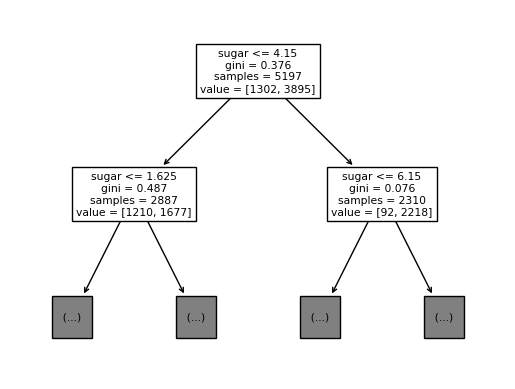

In [17]:
plot_tree(dt,max_depth=1,feature_names=['alcohol','sugar','pH'])
plt.show()

In [18]:
# 첫 번째 노드 (루트노드)의 지니계수(gini) 직접 구하기 
gini = 1 - ((1302/5197)**2 + (3895/5197)**2)
gini

0.3755285914310402

### 피쳐 중요도 
* df.featureimportances

In [23]:
dt.feature_importances_, dt.feature_names_in_

(array([0.1151057 , 0.87578191, 0.0091124 ]),
 array(['alcohol', 'sugar', 'pH'], dtype=object))

### 강사가 생각하는 피쳐 중요도 결론 => sugar의 피쳐중요도 값이 너무 높고 다른 값은 너무 낮다. ==> 비현실적이다.